<h1 align="center" style="background-color:DodgerBlue;">Desafío - Estimando curvas de densidad de probabilidad</h1>

>
>● Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
>
>● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
>
>● Desarrollo desafío: individual.
>
### Habilidades a evaluar
>
>● Conocer las convenciones y principios rectores de la visualización de gráficos.
>
>● Describir la Ley de los Grandes Números y Teorema del Límite Central y su importancia en la inferencia estadística.
### Descripción
>La empresa en la cual usted trabaja quedó muy satisfecha con su análisis anterior del Índice de Desarrollo Humano (IDH) de diversos países, el cual se elaboró para el Ministerio de Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a
trabajar en relaciones diplomáticas más estrechas con diversos países. Por consiguiente, esta vez le solicitan que, a partir del trabajo hecho en el Desafío precedente, usted pueda seguir profundizando en la base de datos Quality of Government, de la Universidad de Gotemburgo.
>
### Requerimientos
>A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide realizar.
>1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la sesión pasada.
>
>2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
>
>● Generar un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e importe.
>
>● Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.
>
>3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
>
>● Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: 𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)
>
>● Para ordenar los valores pueden utilizar la función sort_values del DataFrame analizado. Lean la documentación asociada al argumento by.
>
>● Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna. Lean la documentación asociada al argumento subset.
>
>● Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?
>
>4. Estimar el puntaje z de las regiones (2 puntos). Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir luego de calcular el puntaje Z).
>
>● Para ello realice un dotplot que muestre el valor promedio de su variable por cada región.
>
>● Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).
>
>5. Generar curvas de Densidad de Probabilidad (2 puntos).
>
>● Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables imf_pop, gle_cgdpc y wdi_exph.
>
>● La función debe contener como argumentos:
>
>○ df: Tabla de datos 1.
>
>○ variable: Variable a contrastar.



In [22]:
# Importacion de librerias necesarias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
#● Generar un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e importe.
from ancilliary_funcs import fetch_descriptives, fetch_null_cases, dotplot, plot_histograma, plot_hist
# Formateo base de gráficos
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 80 # resolución gráficos

In [23]:
#1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la sesión pasada.
df = pd.read_csv('subsample_df_1.csv')
df

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull
0,95,Lesotho,LSO,4,1539.7900,0.495,NaN,7.4,4.053547,NaN,35.212650,False
1,3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,NaN,2.99781,NaN,True
2,104,Malaysia (1966-),MYS,7,12284.2700,0.787,30.709000,4.5,5.258416,5.19593,67.997719,False
3,20,Brazil,BRA,2,9815.2402,0.754,202.768997,4.1,2.720419,5.99395,82.829079,False
4,163,South Sudan,SSD,4,NaN,0.421,NaN,6.9,NaN,1.71297,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
92,114,Montenegro,MNE,1,14538.5200,0.804,0.622000,3.6,4.253060,NaN,NaN,False
93,160,South Africa,ZAF,4,8820.0596,0.665,54.146999,4.9,2.218669,6.02955,NaN,False
94,93,Laos,LAO,7,2926.7700,0.582,6.898000,7.4,3.834710,3.32011,50.828941,False
95,193,Zambia,ZMB,4,1916.7900,0.576,NaN,7.8,4.328835,NaN,NaN,False


In [24]:
df['region_record'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10], ['EastEurope', 'LatAm', 'NorthAfrica', 'SudSaharian', 
                                                                        'WesternDem', 'EastAsia', 'SouthEastAsia', 'SoutAsia', 
                                                                        'Pacific', 'Caribbean'])

<AxesSubplot:xlabel='count', ylabel='region_record'>

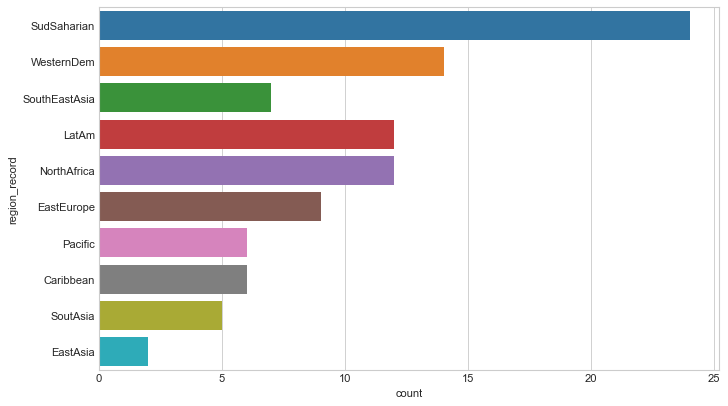

In [25]:
sns.countplot(y = df['region_record'])

In [26]:
fetch_descriptives(df)

count     97.000000
mean      99.340206
std       60.041286
min        2.000000
25%       49.000000
50%      104.000000
75%      157.000000
max      193.000000
Name: Unnamed: 0, dtype: float64
count          97
unique         97
top       Lesotho
freq            1
Name: cname, dtype: object
count      97
unique     97
top       LSO
freq        1
Name: ccodealp, dtype: object
count    97.000000
mean      4.639175
std       2.566554
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: ht_region, dtype: float64
count        96.000000
mean      13607.988716
std       16336.002729
min         332.269990
25%        2451.077575
50%        7315.120100
75%       19903.556500
max      104049.440000
Name: gle_cgdpc, dtype: float64
count    92.000000
mean      0.690228
std       0.153510
min       0.347000
25%       0.557250
50%       0.721000
75%       0.808750
max       0.937000
Name: undp_hdi, dtype: float64
count     73.000000
mean      28.403411

In [27]:
#● Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.
for i in df.columns:
    fetch_null_cases(df, i, print_list=False)


    Casos perdidos para Unnamed: 0
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para cname
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ccodealp
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ht_region
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para gle_cgdpc
    Cantidad de Casos: 1
    Porcentaje de la muestra 1.0309278350515463

    Casos perdidos para undp_hdi
    Cantidad de Casos: 5
    Porcentaje de la muestra 5.154639175257731

    Casos perdidos para imf_pop
    Cantidad de Casos: 24
    Porcentaje de la muestra 24.742268041237114

    Casos perdidos para ffp_hf
    Cantidad de Casos: 9
    Porcentaje de la muestra 9.278350515463918

    Casos perdidos para wef_qes
    Cantidad de Casos: 20
    Porcentaje de la muestra 20.618556701030926

    Casos perdidos para wdi_expedu
    Cantidad de Casos: 31
    Porcentaje de la muestra 31.958762

In [28]:
#3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
#En este caso usaremos ht_region
#● Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z 
# de una observación se utiliza la fórmula: 𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)

df["z"]= (df["ht_region"]-df["ht_region"].mean())/ df["ht_region"].std()
#● Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z 
# de una observación se utiliza la fórmula: 𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)
#● Para ordenar los valores pueden utilizar la función sort_values del DataFrame analizado. Lean la documentación asociada al argumento by.
#● Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna. Lean la documentación asociada al argumento subset.
#● Seleccionen las primeras y últimas 10 observaciones de la base reordenada.
#¿Qué características en común se encuentran?
df=df.sort_values(by="ht_region").dropna(subset=["ht_region"])

In [29]:
df.head(10)

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull,region_record,z
13,189,Uzbekistan,UZB,1,7370.7202,0.697,29.746000,6.3,NaN,NaN,92.207382,False,EastEurope,-1.417923
92,114,Montenegro,MNE,1,14538.5200,0.804,0.622000,3.6,4.253060,NaN,NaN,False,EastEurope,-1.417923
89,6,Azerbaijan,AZE,1,9793.3096,0.758,9.342000,4.3,3.089141,2.63466,NaN,False,EastEurope,-1.417923
20,43,Croatia,HRV,1,18020.4100,0.823,4.238000,4.5,3.225567,4.58160,92.670624,False,EastEurope,-1.417923
8,181,Ukraine,UKR,1,9326.7197,0.748,42.759998,5.5,3.673649,5.86354,88.565857,False,EastEurope,-1.417923
10,158,Slovenia,SVN,1,24456.5610,0.888,2.061000,2.8,4.073011,5.48659,94.945908,False,EastEurope,-1.417923
60,182,Macedonia,MKD,1,9610.5996,0.746,2.069000,5.5,3.961112,NaN,NaN,False,EastEurope,-1.417923
73,56,Estonia,EST,1,19768.0390,0.863,1.316000,3.5,4.364779,5.48164,94.391281,False,EastEurope,-1.417923
67,96,Latvia,LVA,1,16583.6700,0.828,2.001000,4.4,3.764238,5.28524,94.276611,False,EastEurope,-1.417923
33,190,Venezuela,VEN,2,10513.9600,0.769,NaN,5.2,2.640229,NaN,74.789711,False,LatAm,-1.028295


In [55]:
df_1 = df.loc[ : ,['Unnamed: 0', 'cname','ccodealp','ht_region','gle_cgdpc','z']]
df_1

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,z
13,189,Uzbekistan,UZB,1,7370.7202,-1.417923
92,114,Montenegro,MNE,1,14538.5200,-1.417923
89,6,Azerbaijan,AZE,1,9793.3096,-1.417923
20,43,Croatia,HRV,1,18020.4100,-1.417923
8,181,Ukraine,UKR,1,9326.7197,-1.417923
...,...,...,...,...,...,...
11,21,Belize,BLZ,10,6649.1401,2.088725
46,165,Suriname,SUR,10,6049.1499,2.088725
51,68,Grenada,GRD,10,8314.5596,2.088725
44,49,Dominica,DMA,10,12613.7200,2.088725


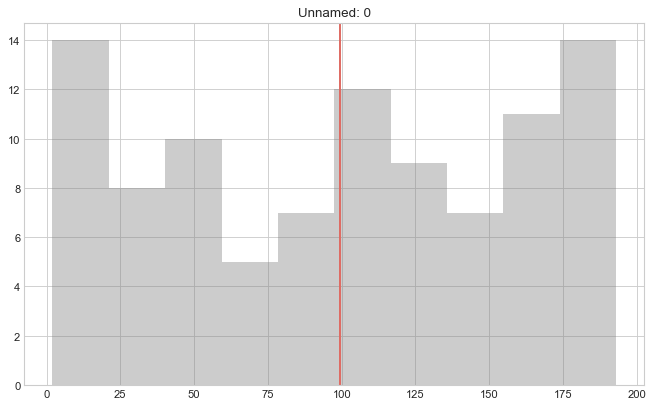

In [48]:
plot_hist(df_1,df,'Unnamed: 0',sample_mean=True, true_mean=True )

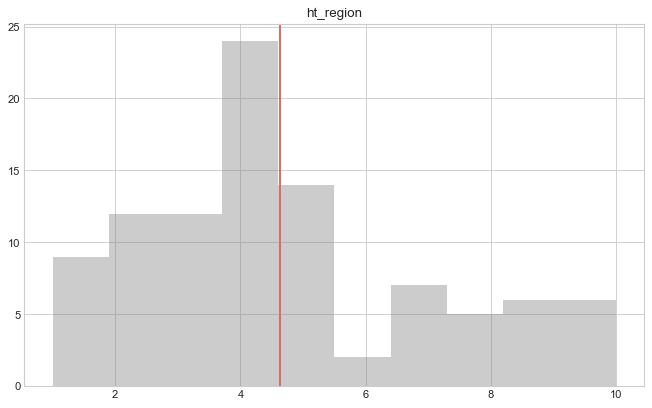

In [52]:
plot_hist(df_1,df,'ht_region',sample_mean=True, true_mean=True )

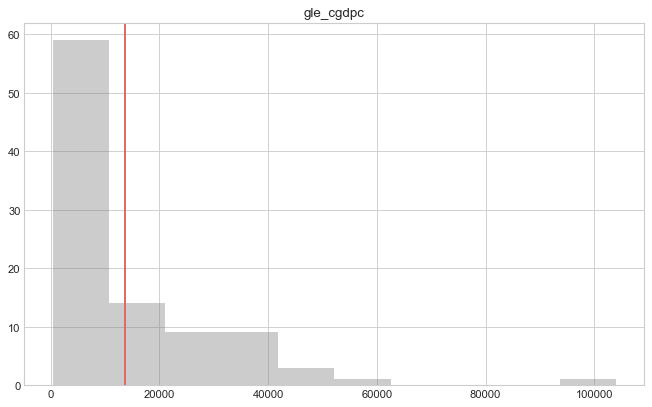

In [53]:
plot_hist(df_1,df,'gle_cgdpc',sample_mean=True, true_mean=True )

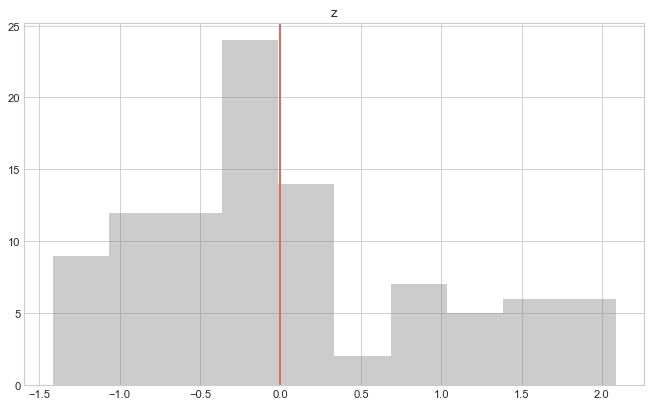

In [56]:
plot_hist(df_1,df,'z',sample_mean=True, true_mean=True )

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de Unnamed: 0')

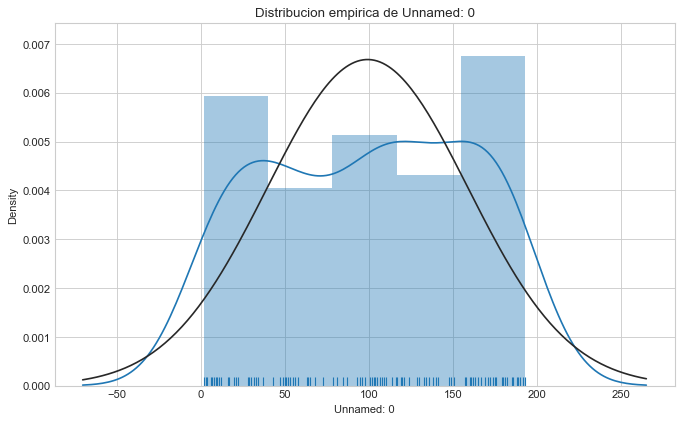

In [72]:
sns.distplot(df_1['Unnamed: 0'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de Unnamed: 0')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de ht_region')

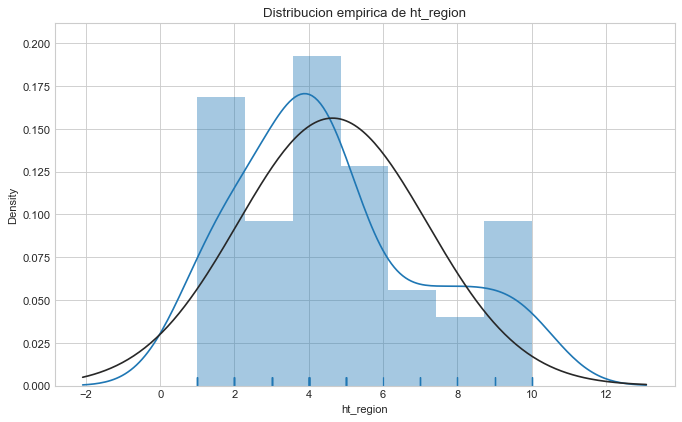

In [71]:
sns.distplot(df_1['ht_region'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de ht_region')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de gle_cgdpc')

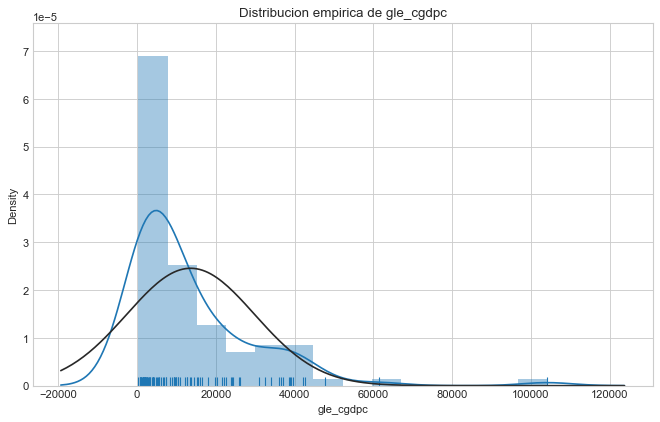

In [70]:
sns.distplot(df_1['gle_cgdpc'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de gle_cgdpc')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de z')

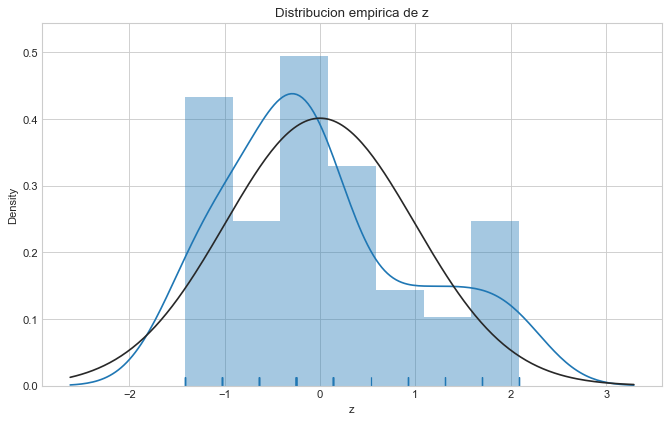

In [69]:
sns.distplot(df_1['z'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de z')

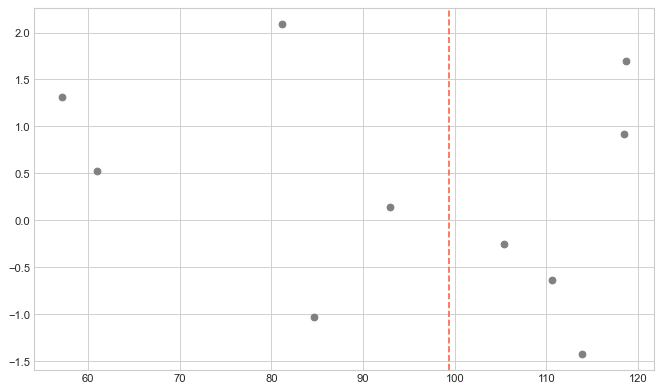

In [68]:
#4. Estimar el puntaje z de las regiones (2 puntos). Utilizando el resultado anterior, visualice su nueva variable estandarizada 
# (es decir, luego de calcular el puntaje Z).
#● Para ello realice un dotplot que muestre el valor promedio de su variable por cada región.
#● Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

#pendiente, intercepto = np.polyfit(df['Unnamed: 0'],df['z'],1)
#linear_fit = [pendiente * j + intercepto for j in df['Unnamed: 0']]
#fig, ax = plt.subplots()
#ax.scatter(x = df['Unnamed: 0'], y = df['z'], marker = '.', s = 1)
#ax.plot(df['Unnamed: 0'], linear_fit, color = 'tomato')
dotplot(df_1,'Unnamed: 0' ,'z' ,global_stat = True)


In [ ]:
df.columns

Index(['Unnamed: 0', 'cname', 'ccodealp', 'ht_region', 'gle_cgdpc', 'undp_hdi',
       'imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners', 'flagnull',
       'region_record', 'z'],
      dtype='object')

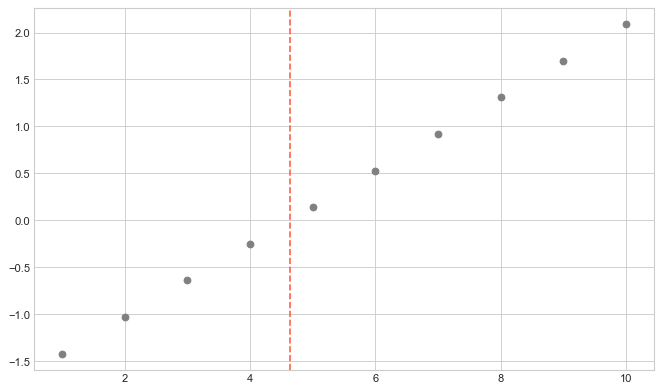

In [67]:
#5. Generar curvas de Densidad de Probabilidad (2 puntos).
#● Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables imf_pop, gle_cgdpc y wdi_exph o ffp_hf.
#● La función debe contener como argumentos:
#○ df: Tabla de datos 1.
#○ variable: Variable a contrastar.
dotplot(df_1,'ht_region' ,'z' ,global_stat = True, statistic = 'mean')

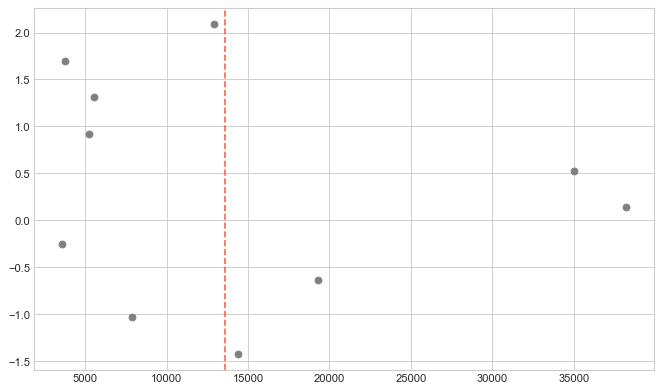

In [66]:
dotplot(df_1,'gle_cgdpc' ,'z' ,global_stat = True, statistic = 'mean')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de gle_cgdpc')

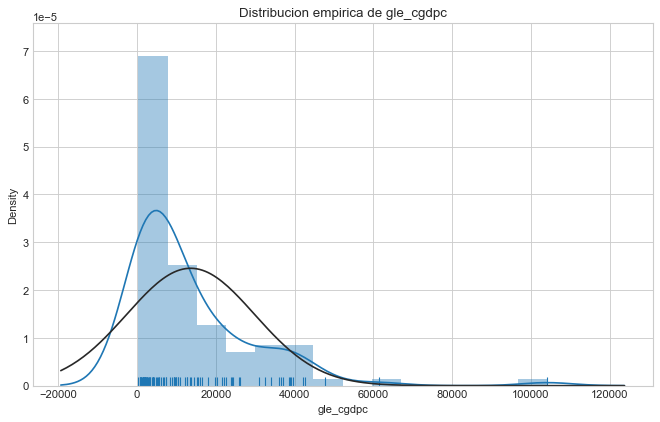

In [65]:
sns.distplot(df_1['gle_cgdpc'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de gle_cgdpc')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion empirica de ffp_hf')

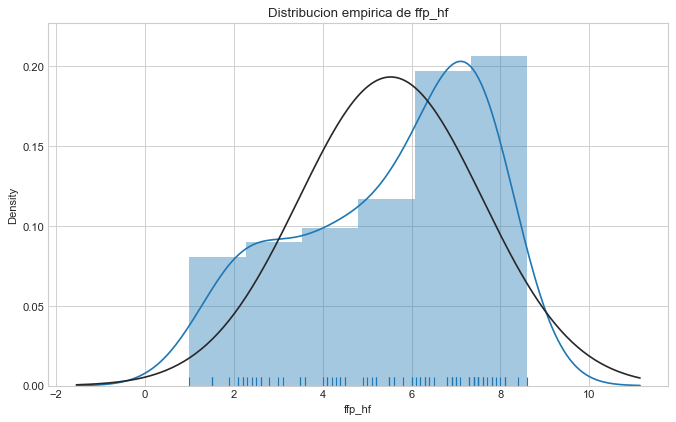

In [ ]:
sns.distplot(df['ffp_hf'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribucion empirica de ffp_hf')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


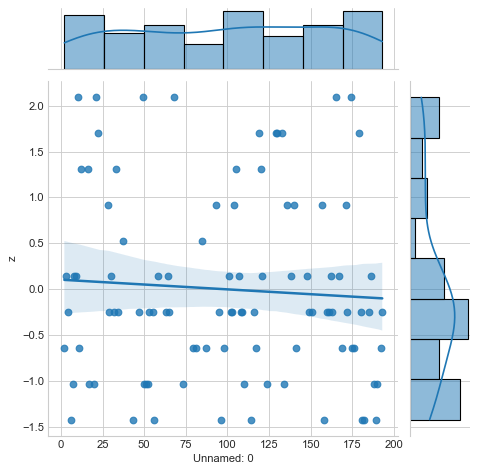

In [76]:
sns.jointplot(df_1['Unnamed: 0'], df['z'], kind = 'reg')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


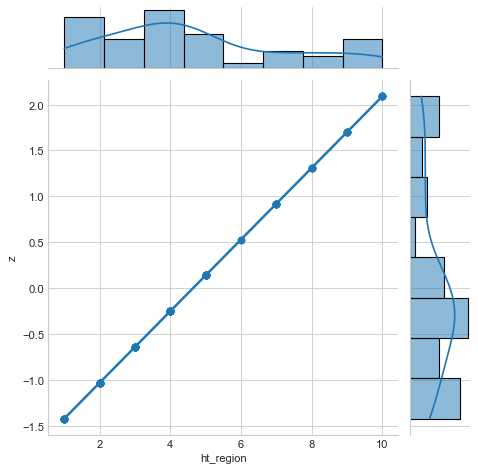

In [77]:
sns.jointplot(df_1['ht_region'], df['z'], kind = 'reg')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


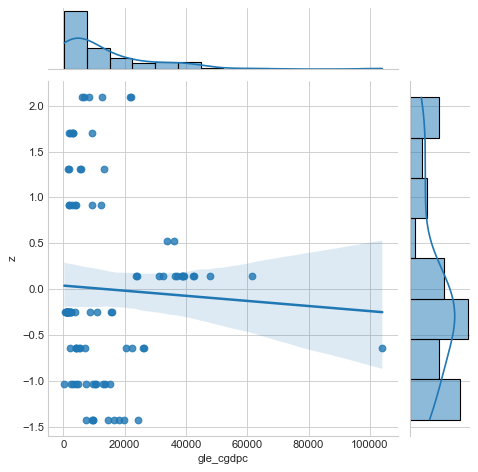

In [94]:
sns.jointplot(df_1['gle_cgdpc'], df['z'], kind = 'reg')